In [1]:
""" This python script plots all figures in Figure2 """

#===============================================================================
# IMPORTS
#===============================================================================
import multiprocessing
import numpy as np
from scipy.sparse import hstack, vstack, csr_matrix
from sklearn.datasets import load_svmlight_file
import pandas as pd
from joblib import Parallel, delayed
from parallel_process import parallel_classification_figure
%matplotlib inline

#===============================================================================
# SETTINGS
#===============================================================================
DIR_DATA = r'./dataset/figure1/'
DIR_CACHE = r'./datacache/'
DIR_FIGURES = r'./figures/'
DIR_TABLE = r'./tables/'
TOTAL_RUN = 100
PARAM = {
    'epsilon': np.hstack(
        (np.arange(1, 10) * 1e-4, np.arange(1, 10) * 1e-3,
         np.arange(1, 11) * 1e-2)),
    'kappa': [0.1, 0.25, 0.5, 0.75, float('inf')],
    'pnorm': 1,
    'd': [],
    'C': []
}

In [5]:
# Helper function for plot
def df_plot(df, name):

    colors = [(0, 0.45, 0.85), (0.85, 0.35, 0), (0.9, 0.7, 0.1),
              (0.5, 0.2, 0.55), (0.45, 0.7, 0.2)]
    line_width = 3
    fig = df.plot(logx=True, color=colors)
    fig.set_xlabel(r'$\rho$', fontdict={'size': 16})
    fig.set_ylabel('CCR')
    for line in fig.get_lines():
        line.set_linewidth(line_width)
    for line in fig.legend().get_lines():
        line.set_linewidth(line_width)
    lines, labels = fig.get_legend_handles_labels()
    fig.legend(lines, [r'$\kappa = 0.1$', r'$\kappa = 0.25$', r'$\kappa = 0.5$',
                       r'$\kappa = 0.75$', r'$\kappa = \infty$'], loc='best')
    fig.get_figure().savefig(DIR_FIGURES + name + '.eps', format='eps', dpi=1000)
    return fig

In [3]:
#===============================================================================
# Load data
#===============================================================================
DIGITS = [3, 8]
PIXEL = 784
DATA1 = load_svmlight_file(DIR_DATA + 'MNIST_train_' + str(DIGITS[0]) + '.txt')
ADD_ZERO1 = csr_matrix(np.zeros((DATA1[0].shape[0], PIXEL - DATA1[0].shape[1])))
DATA2 = load_svmlight_file(DIR_DATA + 'MNIST_train_' + str(DIGITS[1]) + '.txt')
ADD_ZERO2 = csr_matrix(np.zeros((DATA2[0].shape[0], PIXEL - DATA2[0].shape[1])))
x_train = vstack((hstack((DATA1[0], ADD_ZERO1)), hstack((DATA2[0], ADD_ZERO2))))
y_train = np.hstack((DATA1[1], DATA2[1]))
y_train[y_train == DIGITS[0]] = -1
y_train[y_train == DIGITS[1]] = 1
DATA3 = load_svmlight_file(DIR_DATA + 'MNIST_test_' + str(DIGITS[0]) + '.txt')
ADD_ZERO3 = csr_matrix(np.zeros((DATA3[0].shape[0], PIXEL - DATA3[0].shape[1])))
DATA4 = load_svmlight_file(DIR_DATA + 'MNIST_test_' + str(DIGITS[1]) + '.txt')
ADD_ZERO4 = csr_matrix(np.zeros((DATA4[0].shape[0], PIXEL - DATA4[0].shape[1])))
x_test = vstack((hstack((DATA3[0], ADD_ZERO3)), hstack((DATA4[0], ADD_ZERO4))))
y_test = np.hstack((DATA3[1], DATA4[1]))
y_test[y_test == DIGITS[0]] = -1
y_test[y_test == DIGITS[1]] = 1

#===============================================================================
# Train the model
#===============================================================================
NUM_CORES = multiprocessing.cpu_count()
RESULTS = Parallel(n_jobs=NUM_CORES, verbose=11)(
    delayed(parallel_classification_figure)(
        x_train.toarray(), y_train, x_test.toarray(), y_test, PARAM)
    for i in range(TOTAL_RUN))
tmp1, tmp2, tmp3 = zip(*RESULTS)

df1 = pd.DataFrame(index=PARAM['epsilon'], columns=PARAM['kappa'])
for kappa in PARAM['kappa']:
    for epsilon in PARAM['epsilon']:
        tmp = []
        for r in range(TOTAL_RUN):
            tmp.append(tmp1[r][(kappa, epsilon)])
        df1[kappa].loc[epsilon] = np.mean(tmp) if np.mean(tmp)>= 0.5 else np.nan

[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  5.5min
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:  5.6min
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:  5.7min
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:  6.0min
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:  6.0min
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:  6.1min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  6.1min
[Parallel(n_jobs=8)]: Do

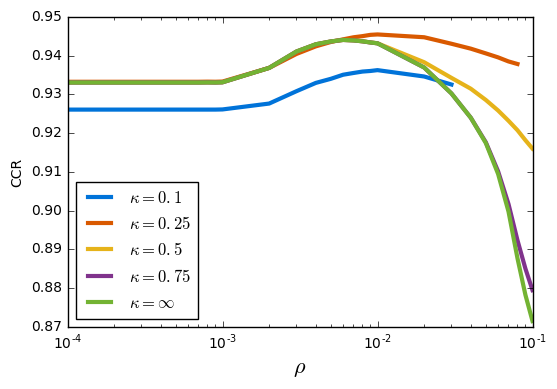

In [6]:
# df1 = pd.read_csv(DIR_CACHE + 'fig1.csv', index_col=0)
df_plot(df1, 'fig1')
df1.to_csv(DIR_CACHE + 'fig1.csv')

In [7]:
#===============================================================================
# Load data
#===============================================================================
DIGITS = [1, 7]
PIXEL = 784
DATA1 = load_svmlight_file(DIR_DATA + 'MNIST_train_' + str(DIGITS[0]) + '.txt')
ADD_ZERO1 = csr_matrix(np.zeros((DATA1[0].shape[0], PIXEL - DATA1[0].shape[1])))
DATA2 = load_svmlight_file(DIR_DATA + 'MNIST_train_' + str(DIGITS[1]) + '.txt')
ADD_ZERO2 = csr_matrix(np.zeros((DATA2[0].shape[0], PIXEL - DATA2[0].shape[1])))
x_train = vstack((hstack((DATA1[0], ADD_ZERO1)), hstack((DATA2[0], ADD_ZERO2))))
y_train = np.hstack((DATA1[1], DATA2[1]))
y_train[y_train == DIGITS[0]] = -1
y_train[y_train == DIGITS[1]] = 1
DATA3 = load_svmlight_file(DIR_DATA + 'MNIST_test_' + str(DIGITS[0]) + '.txt')
ADD_ZERO3 = csr_matrix(np.zeros((DATA3[0].shape[0], PIXEL - DATA3[0].shape[1])))
DATA4 = load_svmlight_file(DIR_DATA + 'MNIST_test_' + str(DIGITS[1]) + '.txt')
ADD_ZERO4 = csr_matrix(np.zeros((DATA4[0].shape[0], PIXEL - DATA4[0].shape[1])))
x_test = vstack((hstack((DATA3[0], ADD_ZERO3)), hstack((DATA4[0], ADD_ZERO4))))
y_test = np.hstack((DATA3[1], DATA4[1]))
y_test[y_test == DIGITS[0]] = -1
y_test[y_test == DIGITS[1]] = 1
#===============================================================================
# Train the model
#===============================================================================
NUM_CORES = multiprocessing.cpu_count()
RESULTS = Parallel(n_jobs=NUM_CORES, verbose=11)(
    delayed(parallel_classification_figure)(
        x_train.toarray(), y_train, x_test.toarray(), y_test, PARAM)
    for i in range(TOTAL_RUN))
tmp1, tmp2, tmp3 = zip(*RESULTS)
df2 = pd.DataFrame(index=PARAM['epsilon'], columns=PARAM['kappa'])
for kappa in PARAM['kappa']:
    for epsilon in PARAM['epsilon']:
        tmp = []
        for r in range(TOTAL_RUN):
            tmp.append(tmp1[r][(kappa, epsilon)])
        df2[kappa].loc[epsilon] = np.mean(tmp) if np.mean(tmp)>= 0.5 else np.nan

[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:  3.8min
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:  3.9min
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:  3.9min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  4.0min
[Parallel(n_jobs=8)]: Do

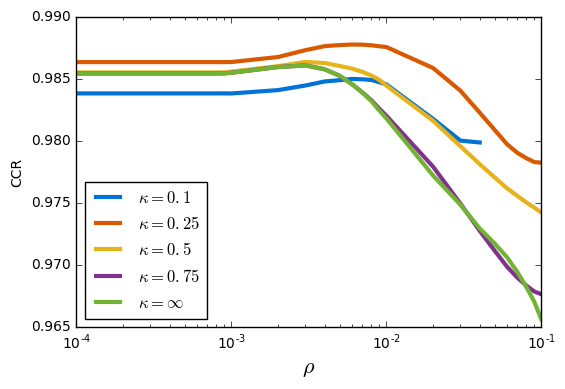

In [8]:
# df2 = pd.read_csv(DIR_CACHE + 'fig2.csv', index_col=0)
df_plot(df2, 'fig2')
df2.to_csv(DIR_CACHE + 'fig2.csv')

In [9]:
#===============================================================================
# Load data
#===============================================================================
DIGITS = [4, 9]
PIXEL = 784
DATA1 = load_svmlight_file(DIR_DATA + 'MNIST_train_' + str(DIGITS[0]) + '.txt')
ADD_ZERO1 = csr_matrix(np.zeros((DATA1[0].shape[0], PIXEL - DATA1[0].shape[1])))
DATA2 = load_svmlight_file(DIR_DATA + 'MNIST_train_' + str(DIGITS[1]) + '.txt')
ADD_ZERO2 = csr_matrix(np.zeros((DATA2[0].shape[0], PIXEL - DATA2[0].shape[1])))
x_train = vstack((hstack((DATA1[0], ADD_ZERO1)), hstack((DATA2[0], ADD_ZERO2))))
y_train = np.hstack((DATA1[1], DATA2[1]))
y_train[y_train == DIGITS[0]] = -1
y_train[y_train == DIGITS[1]] = 1
DATA3 = load_svmlight_file(DIR_DATA + 'MNIST_test_' + str(DIGITS[0]) + '.txt')
ADD_ZERO3 = csr_matrix(np.zeros((DATA3[0].shape[0], PIXEL - DATA3[0].shape[1])))
DATA4 = load_svmlight_file(DIR_DATA + 'MNIST_test_' + str(DIGITS[1]) + '.txt')
ADD_ZERO4 = csr_matrix(np.zeros((DATA4[0].shape[0], PIXEL - DATA4[0].shape[1])))
x_test = vstack((hstack((DATA3[0], ADD_ZERO3)), hstack((DATA4[0], ADD_ZERO4))))
y_test = np.hstack((DATA3[1], DATA4[1]))
y_test[y_test == DIGITS[0]] = -1
y_test[y_test == DIGITS[1]] = 1
#===============================================================================
# Train the model
#===============================================================================
NUM_CORES = multiprocessing.cpu_count()
RESULTS = Parallel(n_jobs=NUM_CORES, verbose=11)(
    delayed(parallel_classification_figure)(
        x_train.toarray(), y_train, x_test.toarray(), y_test, PARAM)
    for i in range(TOTAL_RUN))
tmp1, tmp2, tmp3 = zip(*RESULTS)
df3 = pd.DataFrame(index=PARAM['epsilon'], columns=PARAM['kappa'])
for kappa in PARAM['kappa']:
    for epsilon in PARAM['epsilon']:
        tmp = []
        for r in range(TOTAL_RUN):
            tmp.append(tmp1[r][(kappa, epsilon)])
        df3[kappa].loc[epsilon] = np.mean(tmp) if np.mean(tmp)>= 0.5 else np.nan

[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  4.6min
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:  4.8min
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:  4.9min
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:  4.9min
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:  5.1min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  5.3min
[Parallel(n_jobs=8)]: Do

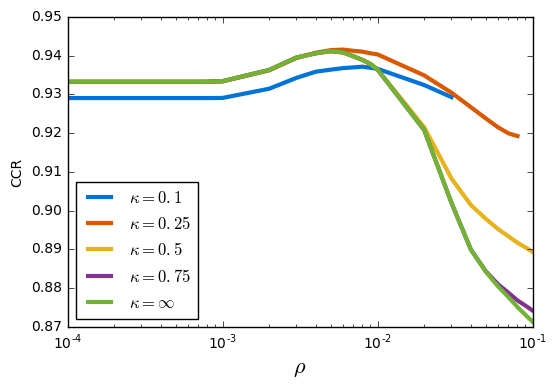

In [10]:
# df3 = pd.read_csv(DIR_CACHE + 'fig3.csv', index_col=0)
df_plot(df3, 'fig3')
df3.to_csv(DIR_CACHE + 'fig3.csv')